# HW6:  Analyzing Data Science in the StackOverflow Tech Job Survey

Every year Stackoverflow does a large survey of tech workers on jobs:
https://insights.stackoverflow.com/survey

Details about the data are below.

For this problem, we want you to extract part of the data involving <i>data science</i> and do two things:
(1) build a regression model to predict salary, and
(2) build a classifier model to predict the job title ("occupation").

You are encouraged to use Python for this assignment.
Python will be the default platform for the datasets in the Final Exam.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from patsy import dmatrices

import pandas as pd
from pandas import Series, DataFrame

import statsmodels.api as sm

from sklearn import datasets, svm

## Part 0:  Getting the Survey data

First, go to the survey site and download the 2016 data:
https://insights.stackoverflow.com/survey
    
(The results of the 2017 survey are there, but the data is not yet available for download now.)

For this problem, we want you to extract a subset of the data involving <i>data science</i>,
and compare the results for it with results for the entire dataset.

The <b>occupation</b> column in the dataset (i.e., column number 10)
involves job titles.  Please extract all rows that have
any of the job titles of interest here
(with the number of occurrences listed first):
<ul><li>
<b>Business intelligence or data warehousing expert</b> (392 occurrences)
</li><li>
<b>Data scientist</b> (800 occurrences)
</li><li>
<b>Developer with a statistics or mathematics background</b>  (960)
</li><li>
<b>Machine learning developer</b> (385).
</li></ul>

For this problem, extract all rows with these job titles into a <tt>DataScience</tt> table with about 2500 rows.

We also want you to consider the entire dataset; for simplicity let's call it <tt>JobSurvey</tt>.

<b>HOWEVER:  We want you to drop all rows with null values from</b> <tt>JobSurvey</tt>.

For each of the following parts, extract a model and compute its accuracy for each of these two datasets.


In [46]:
JobSurvey = pd.read_csv('2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')

JobSurvey.shape

(56030, 66)

## Drop null values from the Job Survey data

In [19]:
#  Drastic action:  drop null values

JobSurvey = JobSurvey.dropna()
JobSurvey.shape

(15591, 66)

In [20]:
JobSurvey[ JobSurvey.occupation == 'Data scientist' ][0:4]

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
205,31023,Facebook,Australia,Australia and New Zealand,Oceania,35-39,37.0,Female,Programmer,Data scientist,...,I don't care about this,This is very important,This is somewhat important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,Poor team dynamics; Inefficient development pr...,To get help for my job
326,25935,Facebook,Austria,Western Europe,Western Europe,25-29,27.0,Male,Developer; Engineer; Programmer; Guru,Data scientist,...,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,Inefficient development processes; Fragile cod...,To get help for my job; To communicate with ot...
581,33903,Facebook,Brazil,South America,South America,25-29,27.0,Male,Developer; Engineer; Programmer,Data scientist,...,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,Unrealistic expectations; Poor documentation; ...,To get help for my job; To communicate with ot...
728,49226,Facebook,Brazil,South America,South America,30-34,32.0,Male,Developer; Programmer; Sr. Developer; Full-sta...,Data scientist,...,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is very important,Unrealistic expectations; Corporate policies; ...,To get help for my job; To give help to others...


In [21]:
JobSurvey[ JobSurvey.salary_midpoint > 200000 ][0:5]

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
1185,31376,Facebook,Denmark,Northern Europe,Western Europe,30-34,32.0,Male,Sr. Developer; Expert,Enterprise level services developer,...,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,Inefficient development processes; Unrealistic...,To get help for my job; To give help to others...
2278,5778,Facebook,Germany,Western Europe,Western Europe,40-49,44.5,Male,Engineer; Manager; Guru; Expert; Hacker,Data scientist,...,I don't care about this,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Unrealistic expectations; Poor documentation; ...,To get help for my job; To communicate with ot...
2520,10178,Facebook,Germany,Western Europe,Western Europe,25-29,27.0,Male,Engineer; Manager; Expert,"Executive (VP of Eng., CTO, CIO, etc.)",...,I don't care about this,This is somewhat important,This is somewhat important,This is somewhat important,I don't care about this,This is very important,I don't care about this,This is somewhat important,Unspecific requirements; Limited resources,To get help for my job; To give help to others...
3437,5312,Facebook,Ireland {Republic},Northern Europe,Western Europe,40-49,44.5,Male,Engineer; Manager,"Executive (VP of Eng., CTO, CIO, etc.)",...,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,I don't care about this,I don't care about this,Fragile code base; Unrealistic expectations; P...,To get help for my job; Because I can't do my ...
3812,29495,Facebook,Italy,Southern Europe,Western Europe,40-49,44.5,Male,Sr. Developer; Ninja; Guru,"Executive (VP of Eng., CTO, CIO, etc.)",...,I don't care about this,This is very important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,This is very important,Inefficient development processes; Fragile cod...,To get help for my job; Beacause I love to learn


In [28]:
JobSurvey.columns[0]  # strangely named because the column name was omitted

'Unnamed: 0'

In [29]:
JobSurvey.shape

(15591, 67)

In [33]:
JobSurvey[['jobId']] = JobSurvey[['Unnamed: 0']]
JobSurvey.shape

(15591, 67)

In [49]:

#JobSurvey[['dream_job']] = (JobSurvey.job_satisfaction == 'I love my job')
#JobSurvey[['dream_job']][0:5]

In [48]:
DataScienceJobSurvey = JobSurvey[ JobSurvey.occupation == 'Data scientist' ]
DataScienceJobSurvey[0:5]

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
28,34171,Facebook,Andorra,Southern Europe,Western Europe,20-24,22.0,Female,Hacker,Data scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,29315,Facebook,Argentina,South America,South America,20-24,22.0,Male,Developer; Engineer; Sr. Developer; Full-stack...,Data scientist,...,This is somewhat important,This is somewhat important,This is very important,I don't care about this,This is very important,This is somewhat important,This is somewhat important,I don't care about this,Fragile code base; Poor documentation; Changin...,To get help for my job; To give help to others
205,31023,Facebook,Australia,Australia and New Zealand,Oceania,35-39,37.0,Female,Programmer,Data scientist,...,I don't care about this,This is very important,This is somewhat important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,Poor team dynamics; Inefficient development pr...,To get help for my job
225,49442,Facebook,Australia,Australia and New Zealand,Oceania,20-24,22.0,Male,Developer; Engineer; Programmer,Data scientist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,2229,Facebook,Austria,Western Europe,Western Europe,50-59,54.5,Male,Engineer; Programmer; Sr. Developer; Expert,Data scientist,...,I don't care about this,This is very important,This is very important,This is very important,I don't care about this,This is somewhat important,This is very important,This is somewhat important,Unrealistic expectations; Poor documentation; ...,To get help for my job; Beacause I love to learn


In [36]:
#  Pandas can do SQL-like computations:

#   project on Data Science Employer ("collector") and country columns
#     group by Data Science Employer and country
#       count jobIDs per Employer and country
#         order results by this count, in descending order
#           show the top 20 results

DataScienceEmployerStats = DataScienceJobSurvey[['collector','country','jobId']]. \
    groupby(['collector','country']).count().sort_values(by='jobId', ascending=False)
DataScienceEmployerStats.head(20)


jobId
collector                country                  
Meta Stack Overflow Post United States          62
                         United Kingdom         16
Reddit                   United States          14
Meta Stack Overflow Post Germany                12
                         India                  10
House ads                India                  10
Facebook                 United Kingdom          7
Reddit                   United Kingdom          6
House ads                United States           6
Facebook                 Germany                 6
Meta Stack Overflow Post Switzerland             6
Facebook                 United States           5
Meta Stack Overflow Post Canada                  5
Twitter                  United States           4
Facebook                 France                  4
Twitter                  France                  4
Meta Stack Overflow Post Denmark                 3
House ads                Germany                 3
Meta Stack Overflow Post South Africa            3
                         Russian Federation      3

## Part 1:  Predicting Salary

The texts in this course have presented a number of regression models for predicting numeric values.

Develop a "regression" model that predicts the <b>salary_midpoint</b> value (i.e., column number 15).

You should use "MSE" (Minimum Squared Error) as the accuracy measure.
Develop a model that reduces this error measure.

This is asking you to produce the best model you can for each of the two datasets
-- with the highest possible accuracy.
In other words, you are asked to produce to models, and report the accuracy of each of them.

## Part 2:  Predicting Job Satisfaction

All of the tools covered in this course provide a large number of classifiers.

Develop a classifier model that predicts the <b>job satisfaction</b> value (i.e., column number 27).

More specifically, predict whether the value is <tt>"I love my job"</tt>.

Please use "accuracy rate" (percentage of correct predictions) as the measure of accuracy for this analysis.
For each of the two datasets, develop the best model you can -- with the highest possible accuracy.


# More in case it helps

In [37]:
from sklearn.decomposition import PCA

In [38]:
NumericJobSurveyVariables = JobSurvey[['age_midpoint', 'salary_midpoint', 'big_mac_index', 'experience_midpoint', 'programming_ability']]

In [39]:
NonZeroVarianceFeatures = (NumericJobSurveyVariables.var(axis=0) != 0.0)
# print((np.array(range(p))[NonZeroVarianceFeatures])) # [0:5])
NonZeroVarianceFeatures.shape

(5,)

In [40]:
NZV_Table = NumericJobSurveyVariables.loc[:,NonZeroVarianceFeatures]
NZV_Table.columns

Index(['age_midpoint', 'salary_midpoint', 'big_mac_index',
       'experience_midpoint', 'programming_ability'],
      dtype='object')

In [41]:
FeatureCorrMatrix = np.corrcoef(NZV_Table.T)
FeatureCorrMatrix

array([[ 1.        ,  0.44223065,  0.23736299,  0.68316481,  0.27385344],
       [ 0.44223065,  1.        ,  0.57148998,  0.47207931,  0.29950438],
       [ 0.23736299,  0.57148998,  1.        ,  0.24047349,  0.11976646],
       [ 0.68316481,  0.47207931,  0.24047349,  1.        ,  0.43595055],
       [ 0.27385344,  0.29950438,  0.11976646,  0.43595055,  1.        ]])

In [42]:
pca = PCA(n_components=2)

pca.fit(np.corrcoef(FeatureCorrMatrix))

PCA(copy=True, n_components=2, whiten=False)

In [43]:
x = np.array( pca.components_[0,:] )
y = np.array( pca.components_[1,:] )

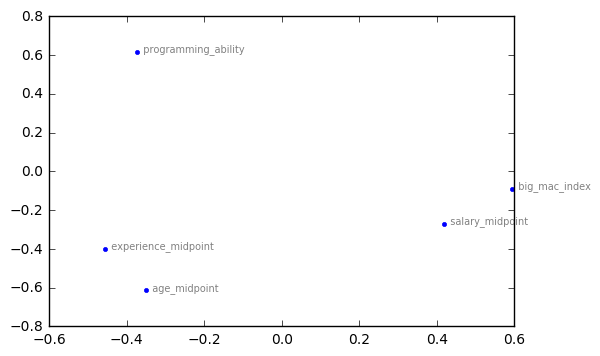

In [44]:
plt.plot( x, y, 'b.')

s = NZV_Table.columns.get_values()
for i in range(len(x)):
    plt.text( x[i], y[i], '  ' + s[i], fontsize=7, alpha=0.5 )
plt.show()

In [45]:
# help(plt.text)

## The Questionnaire for the Survey

The .txt file you can obtain from the download site has the content below;
to avoid confusion we include it here.

<pre>
The Public 2016 Stack Overflow Developer Survey Results

Description:

The enclosed data set is the full, cleaned results of the 2016 Stack Overflow Developer Survey. Free response submissions have been removed from the results to protect the privacy of respondents. 

The survey took place January 7 - January 25, 2016, with responses sourced from Stack Overflow, Stack Exchange technical sites, and Facebook and Twitter. All questions were optional. You can find the official published results here:

http://stackoverflow.com/research/developer-survey-2016

Find previous survey results here:

http://stackoverflow.com/research/

Legal:

This database - The Public 2016 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/

TLDR: You are free to share, adapt, and create derivative works from The Public 2016 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.

Acknowledgment:

Massive, heartfelt thanks to all Stack Overflow contributors and lurking developers of the world who took part in the survey this year. We value your generous participation more than you know.

Database schema:

Column Name --- Survey Question --- Note (if any)

'collector' --- N/A --- Respondent source
'country' --- In what country do you currently reside? --- 
'un_subregion' --- N/A --- Region inferred by country location (UN region)
'so_region' --- N/A --- Region inferred by country location (semi-arbitrary Stack Overflow region groupings)
'age_range' --- How old are you?
'age_midpoint' --- N/A --- Age inferred by age range
'gender' --- What is your gender? --- Gender provided by respondent
'self_identification' --- What do you consider yourself? (select all that apply)
'occupation' --- Which of the following best describes your occupation?
'occupation_group' --- N/A --- Inferred from occupation
'experience_range' --- How many years of IT / programming experience do you have?
'experience_midpoint' --- N/A --- Inferred from experience_range
'salary_range' --- What is your annual gross earnings or salary (including bonus) in USD?
'salary_midpoint' --- N/A --- Inferred from salary_range
'big_mac_index' --- N/A --- Jan 2016 Big Mac Index for country from: http://www.economist.com/content/big-mac-index
'tech_do' --- Which of the following languages or technologies have you done extensive development with in the last year? (select all that apply)
'tech_want' --- Which of the following languages or technologies do you WANT to work with this year? (select all that apply)
'aliens' --- Do you believe in aliens?
'programming_ability' --- On a scale of 1-10, how would you rate your programming ability?
'employment_status' --- How would you describe your current employment status?
'industry' --- How would you best describe the industry you currently work in?
'company_size_range' --- What is the size of your company?
'team_size_range' --- What is the size of your team?
'women_on_team' --- How many women are on your team?
'remote' --- Do you work remotely?
'job_satisfaction' --- How satisfied are you with your current job(s)?
'job_discovery' --- How did you discover your current job?
'dev_environment' --- What development environments do you use regularly? (select all that apply)
'commit_frequency' --- How frequently do you check-in or commit code?
'hobby' --- How much time per week do you spend programming as a hobby, or working on side projects or open-source?
'dogs_vs_cats' --- Dogs or cats?
'desktop_os' --- Which desktop operating system do you use most?
'unit_testing' --- Is unit testing worth the effort?
'rep_range' --- What is your current Stack Overflow reputation?
'visit_frequency' --- How frequently do you read Stack Overflow questions or answers?
'why_learn_new_tech' --- What is your primary motivation for learning new programming languages or technologies?
'education' --- What amount of formal or professional programming training have you received? (select all that apply)
'open_to_new_job' --- Are you currently looking for a job or open to new opportunities?
'new_job_value' --- When evaluating a new employment opportunity what's most important to you? (select up to 3)
'job_search_annoyance' --- What annoys you most when searching for a new job?
'interview_likelihood' --- If you applied to a job at Google, what do you think is the likelihood you would get an interview?
'how_to_improve_interview_process' --- How can companies improve the interview process? (select up to 3)
'star_wars_vs_star_trek' --- Star Wars or Star Trek?
'agree_tech' --- How much do you agree or disagree with the following statements? --- I love the technologies I use at work.
'agree_notice' --- How much do you agree or disagree with the following statements? --- Every day I notice things that can be improved by better software.
'agree_problemsolving' --- How much do you agree or disagree with the following statements? --- I love problem solving.
'agree_diversity' --- How much do you agree or disagree with the following statements? --- Diversity in the workplace is important.
'agree_adblocker' --- How much do you agree or disagree with the following statements? --- I always use an ad blocker.
'agree_alcohol' --- How much do you agree or disagree with the following statements? --- I occasionally drink alcohol while coding.
'agree_loveboss' --- How much do you agree or disagree with the following statements? --- I love my boss.
'agree_nightcode' --- How much do you agree or disagree with the following statements? --- I love coding late at night.
'agree_legacy' --- How much do you agree or disagree with the following statements? --- I work with a lot of legacy code.
'agree_mars' --- How much do you agree or disagree with the following statements? --- I want to go to Mars right now, even if there's a chance I never come back.
'important_variety' --- What's important to you at work? --- Working on a variety of projects
'important_control' --- What's important to you at work? --- Having control over product decisions
'important_sameend' --- What's important to you at work? --- Ending work at the same time every day
'important_newtech' --- What's important to you at work? --- Learning new technologies
'important_buildnew' --- What's important to you at work? --- Building something new
'important_buildexisting' --- What's important to you at work? --- Improving existing applications
'important_promotion' --- What's important to you at work? --- Getting promoted
'important_companymission' --- What's important to you at work? --- Believing strongly in my company's mission
'important_wfh' --- What's important to you at work? --- Working from home
'important_ownoffice' --- What's important to you at work? --- Having my own office
'developer_challenges' --- What are the biggest challenges you face as a developer? (select up to 3)
'why_stack_overflow' --- Why do you use Stack Overflow? (select all that apply)

</pre>


##  Summary: columns of the Tech Job survey dataset

Exploring 65MB is enough to require power tools.  Might as well be frank.

The material below is output of the "csvstat" program, which is part of the "csvkit" set of tools.
It gives a somewhat more detailed summary of the columns in the dataset.  R is probably a better tool
for cleaning a dataset like this, but sometimes it helps to have a command-line tool
that gives you an overview of the data.

Also, csvkit has a sql (sqllite) query processor in it, permitting aggregegation of the data --
and it can be very useful.   SQL as a command-line tool for querying/extracting data from .csv files.  

<pre>
1. _unnamed
    <class 'int'>
    Nulls: False
    Min: 0
    Max: 56029
    Mean: 28014.5
    Unique values: 56030

2. collector
    <class 'str'>
    Nulls: False
    Unique values: 6
    5 most frequent values:
     +  Meta Stack Overflow Post:    28177
     +  Facebook:    9811
     +  House ads:    8633
     +  Reddit:    6226
     +  Twitter:    3075
    Max length: 24

3. country
    <class 'str'>
    Nulls: True
    Unique values: 175
    5 most frequent values:
     +  United States:    13539
     +  United Kingdom:    4573
     +  India:    4193
     +  Germany:    3883
     +  Canada:    2024
    Max length: 22

4. un_subregion
    <class 'str'>
    Nulls: True
    Unique values: 20
    5 most frequent values:
     +  North America:    15565
     +  Western Europe:    8330
     +  Northern Europe:    8086
     +  Eastern Europe:    6314
     +  Southern Asia:    5314
    Max length: 25

5. so_region
    <class 'str'>
    Nulls: True
    Unique values: 14
    5 most frequent values:
     +  Western Europe:    19157
     +  North America:    15563
     +  Eastern Europe:    7396
     +  South Asia:    4894
     +  South America:    1780
    Max length: 15

6. age_range
    <class 'str'>
    Nulls: True
    Unique values: 9
    5 most frequent values:
     +  25-29:    15702
     +  20-24:    13055
     +  30-34:    10018
     +  35-39:    5657
     +  40-49:    4905
    Max length: 22

7. age_midpoint
    <class 'float'>
    Nulls: True
    Min: 16.0
    Max: 65.0
    Mean: 29.621286323550674
    Unique values: 8
    5 most frequent values:
     +  27.0:    15702
     +  22.0:    13055
     +  32.0:    10018
     +  37.0:    5657
     +  44.5:    4905

8. gender
    <class 'str'>
    Nulls: True
    Values: Male, Other, Prefer not to disclose, Female

9. self_identification
    <class 'str'>
    Nulls: True
    Unique values: 1723
    5 most frequent values:
     +  Developer:    5763
     +  Developer; Programmer:    5437
     +  Developer; Engineer; Programmer:    4453
     +  Programmer:    2230
     +  Engineer:    1760
    Max length: 147

10. occupation
    <class 'str'>
    Nulls: True
    Unique values: 27
    5 most frequent values:
     +  Full-stack web developer:    13886
     +  Back-end web developer:    6061
     +  Student:    5619
     +  Desktop developer:    3390
     +  Front-end web developer:    2873
    Max length: 53

11. occupation_group
    <class 'str'>
    Nulls: True
    Unique values: 21
    5 most frequent values:
     +  Full-stack web developer:    13886
     +  Back-end web developer:    6061
     +  Student:    5619
     +  Mobile Dev (Android, iOS, WP & Multi-Platform):    4139
     +  Desktop developer:    3390
    Max length: 100

12. experience_range
    <class 'str'>
    Nulls: True
    Values: 6 - 10 years, 1 - 2 years, 11+ years, Less than 1 year, 2 - 5 years

13. experience_midpoint
    <class 'float'>
    Nulls: True
    Values: 0.5, 1.5, 3.5, 13.0, 8.0

14. salary_range
    <class 'str'>
    Nulls: True
    Unique values: 24
    5 most frequent values:
     +  Less than $10,000:    7686
     +  $10,000 - $20,000:    4977
     +  $20,000 - $30,000:    3677
     +  $30,000 - $40,000:    3429
     +  $40,000 - $50,000:    3291
    Max length: 22

15. salary_midpoint
    <class 'float'>
    Nulls: True
    Min: 5000.0
    Max: 210000.0
    Mean: 53952.973024771214
    Unique values: 21
    5 most frequent values:
     +  5000.0:    7686
     +  15000.0:    4977
     +  25000.0:    3677
     +  35000.0:    3429
     +  45000.0:    3291

16. big_mac_index
    <class 'float'>
    Nulls: True
    Min: 1.53
    Max: 6.44
    Mean: 3.907441679466166
    Unique values: 31
    5 most frequent values:
     +  4.93:    13539
     +  4.22:    4573
     +  1.9:    4193
     +  3.86:    3883
     +  4.41:    2066

17. tech_do
    <class 'str'>
    Nulls: True
    Unique values: 19139
    5 most frequent values:
     +  Java:    843
     +  C#:    606
     +  C#; JavaScript; SQL; SQL Server:    561
     +  Android; Java:    515
     +  Python:    501
    Max length: 379

18. tech_want
    <class 'str'>
    Nulls: True
    Unique values: 24294
    5 most frequent values:
     +  C#:    538
     +  Python:    474
     +  Java:    411
     +  C++:    405
     +  Android:    377
    Max length: 379

19. aliens
    <class 'str'>
    Nulls: True
    Values: No, Yes, Other (please specify)

20. programming_ability
    <class 'float'>
    Nulls: True
    Min: 1.0
    Max: 10.0
    Mean: 7.0945468477289175
    Unique values: 10
    5 most frequent values:
     +  7.0:    12901
     +  8.0:    11287
     +  6.0:    6355
     +  9.0:    4380
     +  10.0:    4323

21. employment_status
    <class 'str'>
    Nulls: True
    Unique values: 9
    5 most frequent values:
     +  Employed full-time:    33593
     +  I'm a student:    6269
     +  Freelance / Contractor:    3509
     +  Self-employed:    2122
     +  Employed part-time:    1752
    Max length: 22

22. industry
    <class 'str'>
    Nulls: True
    Unique values: 21
    5 most frequent values:
     +  Software Products:    8916
     +  Other (please specify):    3802
     +  Web Services:    3627
     +  Finance / Banking:    3391
     +  Consulting:    2786
    Max length: 23

23. company_size_range
    <class 'str'>
    Nulls: True
    Unique values: 12
    5 most frequent values:
     +  20-99 employees:    8616
     +  100-499 employees:    6801
     +  10,000+ employees:    4707
     +  10-19 employees:    3972
     +  1-4 employees:    3703
    Max length: 26

24. team_size_range
    <class 'str'>
    Nulls: True
    Unique values: 8
    5 most frequent values:
     +  1-4 people:    15659
     +  5-9 people:    13867
     +  10-14 people:    4735
     +  15-20 people:    2093
     +  20+ people:    1725
    Max length: 22

25. women_on_team
    <class 'str'>
    Nulls: True
    Unique values: 15
    5 most frequent values:
     +  0:    15929
     +  1:    9835
     +  2:    5374
     +  3:    2643
     +  I am not on a "team":    1596
    Max length: 22

26. remote
    <class 'str'>
    Nulls: True
    Values: Part-time remote, Full-time remote, I rarely work remotely, Never

27. job_satisfaction
    <class 'str'>
    Nulls: True
    Unique values: 7
    5 most frequent values:
     +  I'm somewhat satisfied with my job:    16413
     +  I love my job:    13251
     +  I'm somewhat dissatisfied with my job:    4512
     +  I'm neither satisfied nor dissatisfied:    4416
     +  I hate my job:    833
    Max length: 38

28. job_discovery
    <class 'str'>
    Nulls: True
    Unique values: 13
    5 most frequent values:
     +  A friend referred me:    10819
     +  Contacted by external recruiter:    4983
     +  Contacted by company (in-house recruiter):    4960
     +  Other job website e.g. Indeed, Monster, Dice, Xing, etc.:    4920
     +  I knew I wanted to work here. I sought out the opportunity directly:    3682
    Max length: 67

29. dev_environment
    <class 'str'>
    Nulls: True
    Unique values: 4656
    5 most frequent values:
     +  Notepad++; Visual Studio:    2928
     +  Visual Studio:    2149
     +  Sublime:    1884
     +  Vim:    1731
     +  Notepad++:    869
    Max length: 231

30. commit_frequency
    <class 'str'>
    Nulls: True
    Unique values: 7
    5 most frequent values:
     +  Multiple times a day:    26574
     +  A couple times a week:    8256
     +  Once a day:    4925
     +  A few times a month:    2729
     +  I don't "check-in or commit code", but I do put code into production somewhat frequently:    1943
    Max length: 88

31. hobby
    <class 'str'>
    Nulls: True
    Unique values: 6
    5 most frequent values:
     +  2-5 hours per week:    12090
     +  1-2 hours per week:    10898
     +  5-10 hours per week:    9174
     +  10-20 hours per week:    4483
     +  20+ hours per week:    3128
    Max length: 22

32. dogs_vs_cats
    <class 'str'>
    Nulls: True
    Values: Other (please specify), Cats, Dogs

33. desktop_os
    <class 'str'>
    Nulls: True
    Unique values: 11
    5 most frequent values:
     +  Mac OS X:    12150
     +  Windows 7:    10439
     +  Windows 10:    9661
     +  Ubuntu:    5713
     +  Windows 8:    3906
    Max length: 13

34. unit_testing
    <class 'str'>
    Nulls: True
    Values: No, Yes, Other (please specify), I don't know

35. rep_range
    <class 'str'>
    Nulls: True
    Unique values: 9
    5 most frequent values:
     +  2 - 100:    8930
     +  I don't have an account:    8490
     +  101 - 500:    6422
     +  I'm not sure:    5843
     +  1,001 - 5,000:    5677
    Max length: 23

36. visit_frequency
    <class 'str'>
    Nulls: True
    Unique values: 6
    5 most frequent values:
     +  Multiple times a day:    26058
     +  Once a day:    10081
     +  Once a week:    6831
     +  Once a month:    1401
     +  Very rarely:    1397
    Max length: 64

37. why_learn_new_tech
    <class 'str'>
    Nulls: True
    Unique values: 7
    5 most frequent values:
     +  I want to be a better developer:    16236
     +  I'm curious:    13231
     +  To keep my skills up to date:    7400
     +  To build a specific product I have in mind:    3647
     +  I learn new technology when my job requires it:    2766
    Max length: 46

38. education
    <class 'str'>
    Nulls: True
    Unique values: 997
    5 most frequent values:
     +  I'm self-taught:    6197
     +  B.S. in Computer Science (or related field):    3607
     +  I'm self-taught; On-the-job training:    2490
     +  Masters Degree in Computer Science (or related field):    2044
     +  I'm self-taught; On-the-job training; B.S. in Computer Science (or related field):    1799
    Max length: 525

39. open_to_new_job
    <class 'str'>
    Nulls: True
    Values: I'm not actively looking, but I am open to new opportunities,
            I am not interested in new job opportunities, I am actively looking for a new job

40. new_job_value
    <class 'str'>
    Nulls: True
    Unique values: 14390
    5 most frequent values:
     +  Salary; Work/life balance; Company culture:    521
     +  Salary; Work/life balance; Quality of colleagues:    449
     +  Salary; Work/life balance; Office location:    418
     +  Salary; Work/life balance; Building something that's significant:    357
     +  Salary; Work/life balance; Opportunity for advancement:    343
    Max length: 410

41. job_search_annoyance
    <class 'str'>
    Nulls: True
    Unique values: 9
    5 most frequent values:
     +  The interview process:    7481
     +  Writing my CV and keeping it updated:    6474
     +  Writing cover letters:    6195
     +  Searching for a job that seems interesting:    5904
     +  Taking time off work to interview:    4764
    Max length: 42

42. interview_likelihood
    <class 'str'>
    Nulls: True
    Unique values: 12
    5 most frequent values:
     +  50%:    6213
     +  10%:    5468
     +  30%:    4332
     +  0%:    4087
     +  20%:    3918
    Max length: 22

43. how_to_improve_interview_process
    <class 'str'>
    Nulls: True
    Unique values: 487
    5 most frequent values:
     +  Show me more live code; Introduce me to the team; Show me the space in which I will work:    1493
     +  Fewer brainteasers:    1339
     +  Show me more live code:    1157
     +  Offer remote interviews (e.g. via video conference):    988
     +  Prepare me for who I will be speaking with:    927
    Max length: 294

44. star_wars_vs_star_trek
    <class 'str'>
    Nulls: True
    Values: Star Trek, Star Wars; Star Trek, Star Wars

45. agree_tech
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

46. agree_notice
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

47. agree_problemsolving
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

48. agree_diversity
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

49. agree_adblocker
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

50. agree_alcohol
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

51. agree_loveboss
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

52. agree_nightcode
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

53. agree_legacy
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

54. agree_mars
    <class 'str'>
    Nulls: True
    Values: Agree completely, Disagree completely, Disagree somewhat, Neutral, Agree somewhat

55. important_variety
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

56. important_control
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

57. important_sameend
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

58. important_newtech
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

59. important_buildnew
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

60. important_buildexisting
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

61. important_promotion
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

62. important_companymission
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

63. important_wfh
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

64. important_ownoffice
    <class 'str'>
    Nulls: True
    Values: This is somewhat important, This is very important, I don't care about this

65. developer_challenges
    <class 'str'>
    Nulls: True
    Unique values: 8253
    5 most frequent values:
     +  Limited resources:    362
     +  Poor documentation:    357
     +  Unrealistic expectations; Changing requirements; Unspecific requirements:    336
     +  Fragile code base; Poor documentation; Outdated technologies:    303
     +  Fragile code base; Poor documentation; Unspecific requirements:    268
    Max length: 395

66. why_stack_overflow
    <class 'str'>
    Nulls: True
    Unique values: 553
    5 most frequent values:
     +  To get help for my job:    3893
     +  To get help for my job; Beacause I love to learn:    2912
     +  To get help for my job; To receive help on my personal projects; Beacause I love to learn:    2782
     +  To get help for my job; To give help to others; Beacause I love to learn:    2460
     +  To get help for my job; To give help to others:    1995
    Max length: 344

Row count: 56030
</pre>